In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [2]:
#p1
heart=pd.read_csv("C:/Users/acer/Desktop/DM_HW3/heart_diagnose.csv")
heart.head()

,age,sex,pain type,resting blood pressure,cholestoral,fasting blood sugar,resting electrocardiographic results,maximum heart rate,exercise induced angina,oldpeak,slope of peak,num of major vessels,thal,heart disease
0,70,1.0,four,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,normal,1
1,67,0.0,three,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,reversable defect,0
2,57,1.0,two,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,reversable defect,1
3,64,1.0,four,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,reversable defect,0
4,74,0.0,two,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,normal,0


In [3]:
#p1
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   270 non-null    int64  
 1   sex                                   270 non-null    float64
 2   pain type                             270 non-null    object 
 3   resting blood pressure                270 non-null    float64
 4   cholestoral                           270 non-null    float64
 5   fasting blood sugar                   270 non-null    float64
 6   resting electrocardiographic results  270 non-null    float64
 7   maximum heart rate                    270 non-null    float64
 8   exercise induced angina               270 non-null    float64
 9   oldpeak                               270 non-null    float64
 10  slope of peak                         270 non-null    float64
 11  num of major vessel

In [4]:
#p1
#heart = heart.dropna(how='any',axis=0) 
heart.isnull().sum()

#no null records

age                                     0
sex                                     0
pain type                               0
resting blood pressure                  0
cholestoral                             0
fasting blood sugar                     0
resting electrocardiographic results    0
maximum heart rate                      0
exercise induced angina                 0
oldpeak                                 0
slope of peak                           0
num of major vessels                    0
thal                                    0
heart disease                           0
dtype: int64

In [5]:
#p1
heart.dtypes

age                                       int64
sex                                     float64
pain type                                object
resting blood pressure                  float64
cholestoral                             float64
fasting blood sugar                     float64
resting electrocardiographic results    float64
maximum heart rate                      float64
exercise induced angina                 float64
oldpeak                                 float64
slope of peak                           float64
num of major vessels                    float64
thal                                     object
heart disease                             int64
dtype: object

In [6]:
#p2
heart=pd.get_dummies(heart,columns=['pain type','thal'])
heart.shape

(270, 19)

In [7]:
#p3
x=heart.drop('heart disease',axis=1)
Y=heart['heart disease']
Y.shape

(270,)

In [8]:
#p3
Y.value_counts()

0    150
1    120
Name: heart disease, dtype: int64

In [9]:
#p3
x_scaled = StandardScaler().fit_transform(x)
x_scaled.shape

(270, 18)

In [10]:
#p3
pca = PCA(n_components=2)
pca_features = pca.fit_transform(x_scaled)
print('Shape before PCA: ', x_scaled.shape)
print('Shape after PCA: ', pca_features.shape)

pca_df = pd.DataFrame(
    data=pca_features, 
    columns=['PC1', 'PC2'])

pca_df

Shape before PCA:  (270, 18)
Shape after PCA:  (270, 2)


,PC1,PC2
0,2.100740,2.210936
1,0.566297,2.764783
2,-0.609867,-1.797719
3,2.674779,-0.894244
4,-0.682202,1.514927
...,...,...
265,-0.440203,-0.234783
266,-1.441161,-2.693210
267,-1.449240,1.433410
268,0.729541,-1.167361


In [11]:
#p3
target_names = {
    0:'0',
    1:'1', 
}
 
pca_df['target'] = Y
pca_df['target'] = pca_df['target'].map(target_names)

pca_df

,PC1,PC2,target
0,2.100740,2.210936,1
1,0.566297,2.764783,0
2,-0.609867,-1.797719,1
3,2.674779,-0.894244,0
4,-0.682202,1.514927,0
...,...,...,...
265,-0.440203,-0.234783,0
266,-1.441161,-2.693210,0
267,-1.449240,1.433410,0
268,0.729541,-1.167361,0


In [12]:
pca_df.describe()

,PC1,PC2
count,2.700000e+02,2.700000e+02
mean,4.769847e-17,-5.427757e-17
std,1.959093e+00,1.340891e+00
min,-3.608099e+00,-3.088784e+00
25%,-1.653780e+00,-9.440792e-01
50%,-1.807503e-01,-9.105576e-02
75%,1.586722e+00,1.026350e+00
max,4.447956e+00,3.804040e+00


In [13]:
#p4
inertias = []
#data = list(zip(heart))

for i in range(1,21):
    print(i)
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(pca_df)
    inertias.append(kmeans.inertia_)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


k=5 is elbow point.it seems it is better than others.

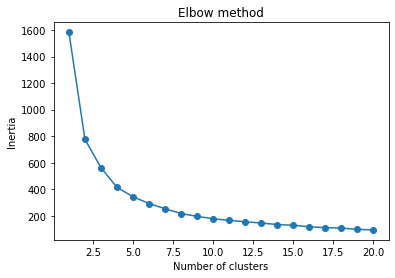

In [14]:
#p4
plt.plot(range(1,21), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

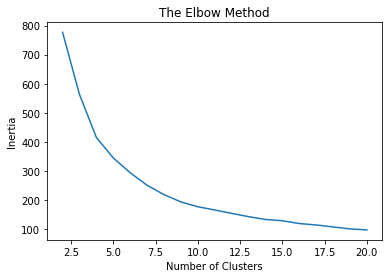

In [15]:
#p4

# calculate k using python, with the elbow method
inertia = []

# define our possible k values
possible_K_values = [i for i in range(2,21)]

# we start with 2, as we can not have 0 clusters in k means, and 1 cluster is just a dataset

# iterate through each of our values
for each_value in possible_K_values:
    
    # iterate through, taking each value from 
    model = KMeans(n_clusters=each_value, init='k-means++',random_state=32)
    
    # fit it on YOUR dataframe
    model.fit(pca_df)
    
    # append the inertia to our array
    inertia.append(model.inertia_)

plt.plot(possible_K_values, inertia)
plt.title('The Elbow Method')

plt.xlabel('Number of Clusters')

plt.ylabel('Inertia')

plt.show()


In [16]:
#p5
silhouettes=[]
possible_K_values = [i for i in range(2,21)]

for each_value in possible_K_values:
     
    model = KMeans(n_clusters=each_value, init='k-means++',random_state=32)
    
    model.fit(pca_df)

    silhouette_score_average = silhouette_score(pca_df, model.predict(pca_df))
    print(each_value)
    print(silhouette_score_average)
    silhouettes.append(silhouette_score_average)

2
0.44322275894821306
3
0.381189109635034
4
0.36266219321639037
5
0.35527259516408066
6
0.3630971484549147
7
0.3466403694270262
8
0.3632073504112235
9
0.36490369902833536
10
0.3679424630882203
11
0.3465015749400662
12
0.3317087154023362
13
0.34198918323314137
14
0.3490097428809508
15
0.3478390492687497
16
0.33374225383749734
17
0.35644019625775186
18
0.3321569745782017
19
0.36552784355778883
20
0.3604832266756166


k=2 has bigger silhoute. so it is best one

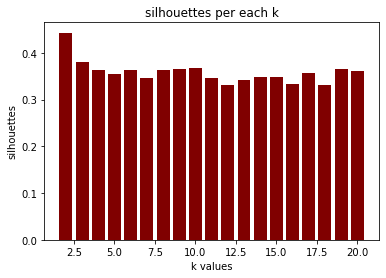

In [17]:
#p5
plt.bar(possible_K_values, silhouettes, color ='maroon')
 
plt.xlabel("k values")
plt.ylabel("silhouettes")
plt.title("silhouettes per each k")
plt.show()

k=2 is better than others because it has number of negative values less than other values of k.

In [18]:
#p5
bad_k_values = {}
possible_K_values = [i for i in range(2,21)]


for each_value in possible_K_values:

    model = KMeans(n_clusters=each_value, init='k-means++',random_state=32)
    
    model.fit(pca_df)
    
    silhouette_score_individual = silhouette_samples(pca_df, model.predict(pca_df))
    for each_silhouette in silhouette_score_individual:
        
        if each_silhouette < 0:
            
            if each_value not in bad_k_values:
                bad_k_values[each_value] = 1
            
            else:
                bad_k_values[each_value] += 1
    
                


for key, val in bad_k_values.items():
    print(f' This Many Clusters: {key} | Number of Negative Values: {val}')



 This Many Clusters: 2 | Number of Negative Values: 1
 This Many Clusters: 3 | Number of Negative Values: 2
 This Many Clusters: 4 | Number of Negative Values: 2
 This Many Clusters: 5 | Number of Negative Values: 10
 This Many Clusters: 6 | Number of Negative Values: 7
 This Many Clusters: 7 | Number of Negative Values: 6
 This Many Clusters: 8 | Number of Negative Values: 5
 This Many Clusters: 9 | Number of Negative Values: 8
 This Many Clusters: 10 | Number of Negative Values: 5
 This Many Clusters: 11 | Number of Negative Values: 9
 This Many Clusters: 12 | Number of Negative Values: 10
 This Many Clusters: 13 | Number of Negative Values: 8
 This Many Clusters: 14 | Number of Negative Values: 5
 This Many Clusters: 15 | Number of Negative Values: 5
 This Many Clusters: 16 | Number of Negative Values: 12
 This Many Clusters: 17 | Number of Negative Values: 6
 This Many Clusters: 18 | Number of Negative Values: 16
 This Many Clusters: 19 | Number of Negative Values: 6
 This Many Clu

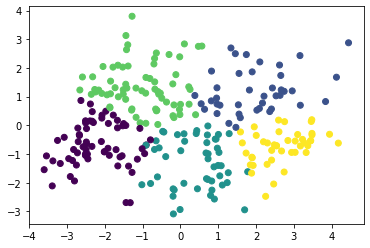

In [19]:
#p6
kmeans_k5 = KMeans(n_clusters=5)
kmeans_k5.fit(pca_df)

plt.scatter(pca_df["PC1"], pca_df["PC2"], c=kmeans_k5.labels_)
plt.show()

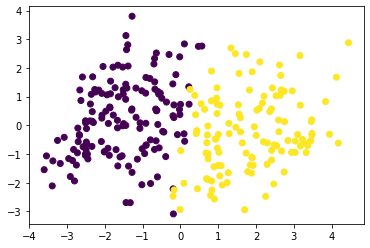

In [20]:
#p6
kmeans_k2 = KMeans(n_clusters=2)
kmeans_k2.fit(pca_df)

plt.scatter(pca_df["PC1"], pca_df["PC2"], c=kmeans_k2.labels_)
plt.show()

In [21]:
#p7
clusters=kmeans_k2.labels_
cluster1_k2=pca_df.loc[clusters==0]
cluster2_k2=pca_df.loc[clusters==1]
kmeans_k2.cluster_centers_

array([[-1.50670187,  0.20955329,  0.11409396],
       [ 1.85536016, -0.25804496,  0.85123967]])

In [22]:
#p7
cluster1_k2.describe()

,PC1,PC2
count,149.000000,149.000000
mean,-1.506702,0.209553
std,0.968679,1.331825
min,-3.608099,-3.088784
25%,-2.338345,-0.840951
50%,-1.515380,0.154664
75%,-0.682202,1.162897
max,0.566297,3.804040


In [23]:
cluster2_k2.describe()

,PC1,PC2
count,121.000000,121.000000
mean,1.855360,-0.258045
std,1.075415,1.311941
min,-0.196809,-2.945274
25%,0.955615,-1.110800
50%,1.848576,-0.351583
75%,2.636447,0.702155
max,4.447956,2.878619


In [24]:
clusters=kmeans_k5.labels_
cluster1_k5=pca_df.loc[clusters==0]
cluster2_k5=pca_df.loc[clusters==1]
cluster3_k5=pca_df.loc[clusters==2]
cluster4_k5=pca_df.loc[clusters==3]
cluster5_k5=pca_df.loc[clusters==4]
kmeans_k5.cluster_centers_

array([[-2.21525333, -0.67969082,  0.04545455],
       [ 1.9676794 ,  1.18760353,  0.87804878],
       [ 0.40990168, -1.33347106,  0.56      ],
       [-1.01203231,  1.34966392,  0.17142857],
       [ 2.69486144, -0.73569935,  0.95348837]])

In [25]:
cluster1_k5.describe()

,PC1,PC2
count,66.000000,66.000000
mean,-2.215253,-0.679691
std,0.685748,0.758295
min,-3.608099,-2.696608
25%,-2.677524,-1.093469
50%,-2.364173,-0.774205
75%,-1.667741,-0.034172
max,-0.794825,0.866072


In [26]:
cluster2_k5.describe()

,PC1,PC2
count,41.000000,41.000000
mean,1.967679,1.187604
std,0.969746,0.749767
min,0.380884,-0.069999
25%,1.280706,0.700282
50%,1.897202,1.029156
75%,2.621970,1.739316
max,4.447956,2.878619


In [27]:
cluster3_k5.describe()

,PC1,PC2
count,50.000000,50.000000
mean,0.409902,-1.333471
std,0.709503,0.864089
min,-1.022427,-3.088784
25%,-0.182705,-2.026377
50%,0.693308,-1.282710
75%,0.937022,-0.543144
max,1.779104,-0.022089


In [28]:
cluster4_k5.describe()

,PC1,PC2
count,70.000000,70.000000
mean,-1.012032,1.349664
std,0.820456,0.811368
min,-2.663356,0.030037
25%,-1.616316,0.732100
50%,-0.972314,1.231218
75%,-0.401150,1.748757
max,0.566297,3.804040


In [29]:
cluster5_k5.describe()

,PC1,PC2
count,43.000000,43.000000
mean,2.694861,-0.735699
std,0.657147,0.572745
min,1.587775,-2.475089
25%,2.225434,-0.957354
50%,2.606534,-0.619318
75%,3.252227,-0.342170
max,4.177931,0.195504
